# Import Required Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load and Explore the dataset

In [21]:
df=pd.read_csv("netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [23]:
df.shape

(8790, 10)

In [24]:
df['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


In [25]:
df['rating'].value_counts()

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


#data Cleaning and Preprocessing

In [26]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [27]:
df=df.drop_duplicates()

In [28]:
df['date_added']=pd.to_datetime(df['date_added'])

# Exploratory data Analysis

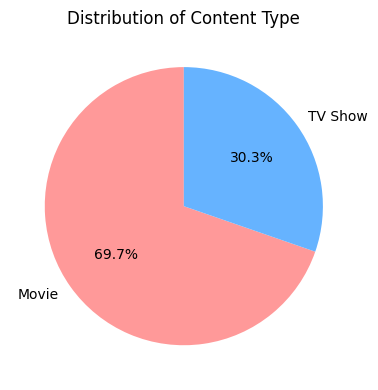

In [29]:
plt.figure(figsize=(6, 4))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#FF9999', '#66B3FF'], startangle=90)
plt.title('Distribution of Content Type')
plt.ylabel('')
plt.tight_layout()
plt.show()

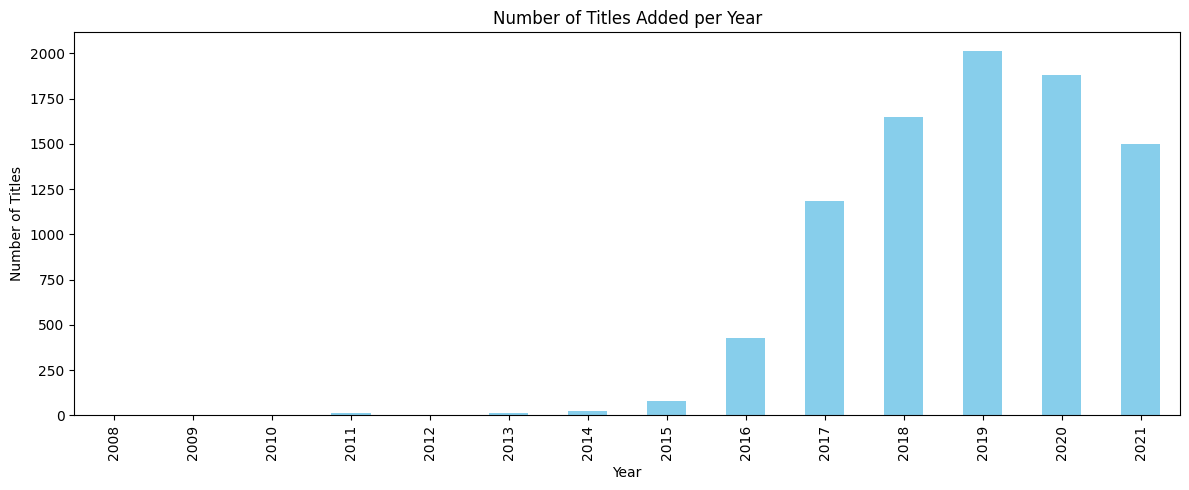

In [30]:
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(12, 5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Titles Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


/tmp/ipython-input-31-639068447.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')


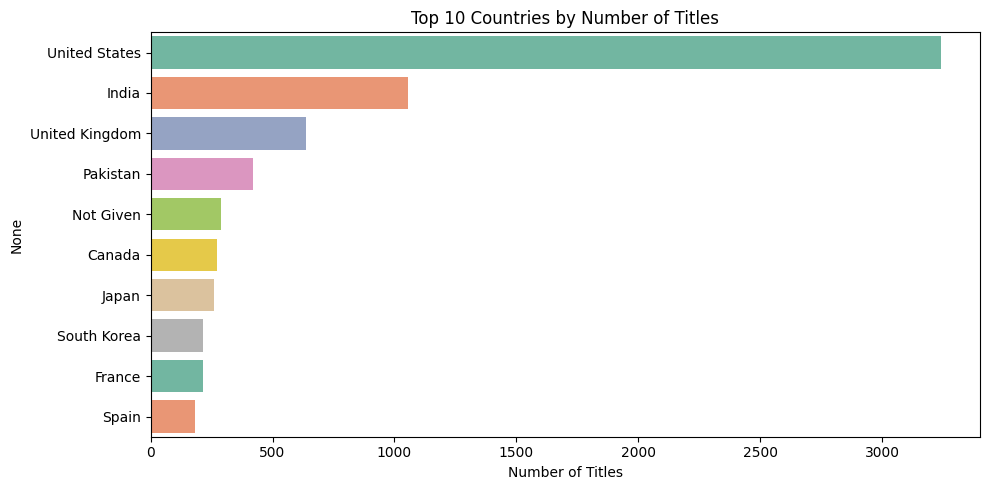

In [31]:
top_countries = df['country'].dropna().str.split(', ', expand=True).stack().value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()


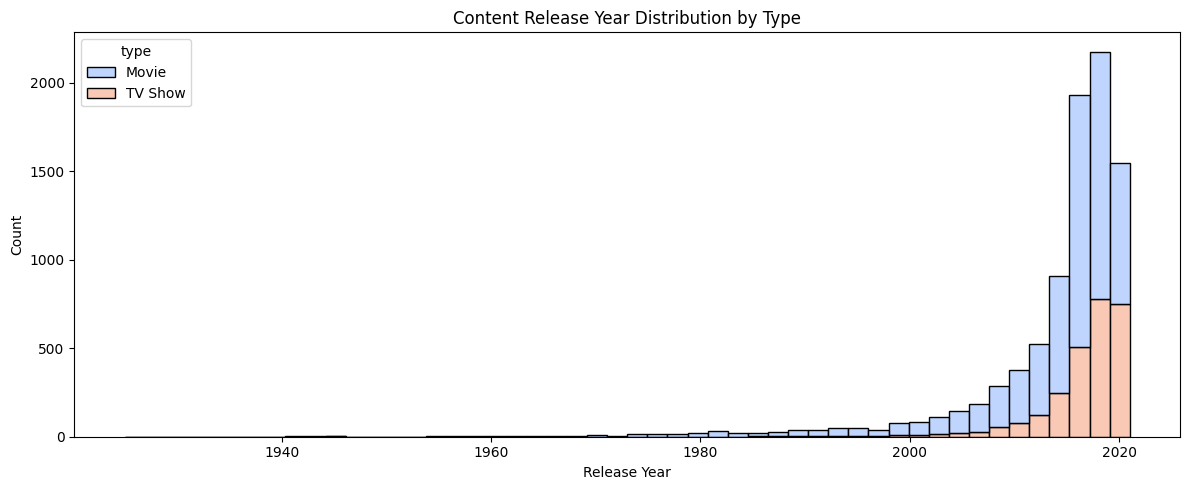

In [32]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='release_year', hue='type', bins=50, palette='coolwarm', multiple='stack')
plt.title('Content Release Year Distribution by Type')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


/tmp/ipython-input-33-1827681657.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


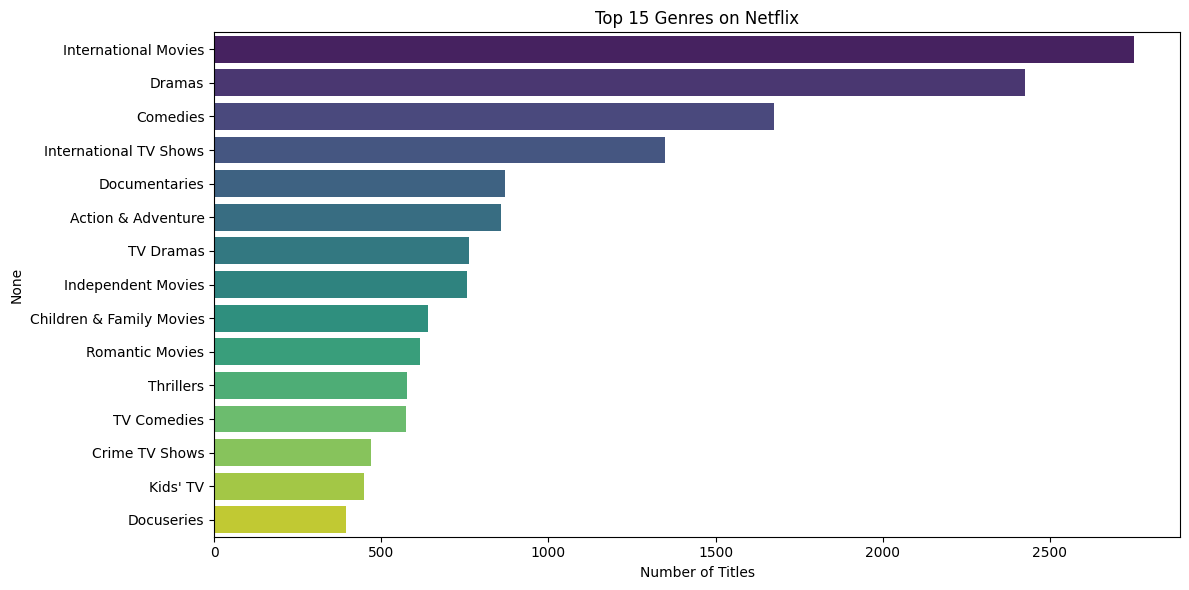

In [33]:
from collections import Counter

genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genres for genre in sublist]
top_genres = pd.Series(Counter(flat_genres)).sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()


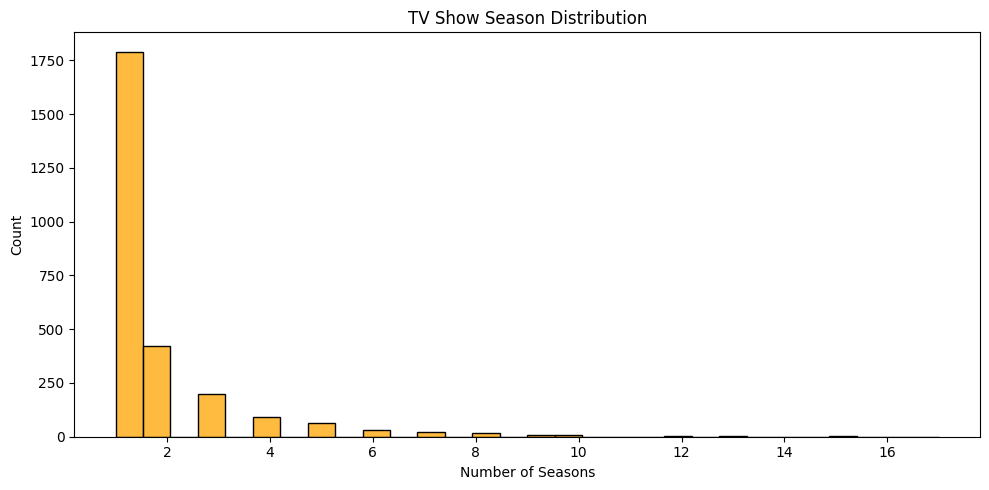

In [34]:
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['seasons'] = tv_shows['duration'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 5))
sns.histplot(tv_shows['seasons'], bins=30, color='orange')
plt.title('TV Show Season Distribution')
plt.xlabel('Number of Seasons')
plt.tight_layout()
plt.show()


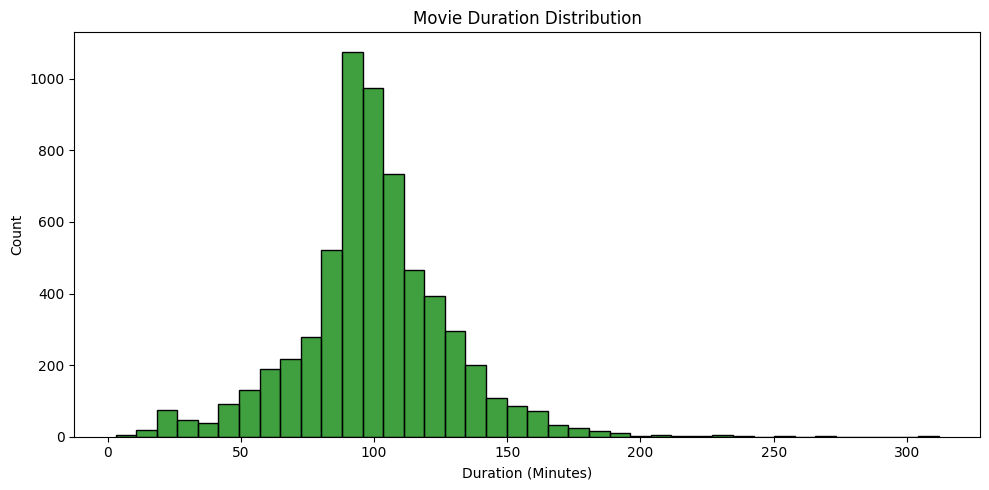

In [35]:
movies = df[df['type'] == 'Movie'].copy()
movies['minutes'] = movies['duration'].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 5))
sns.histplot(movies['minutes'], bins=40, color='green')
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (Minutes)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-36-1602504184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='magma')


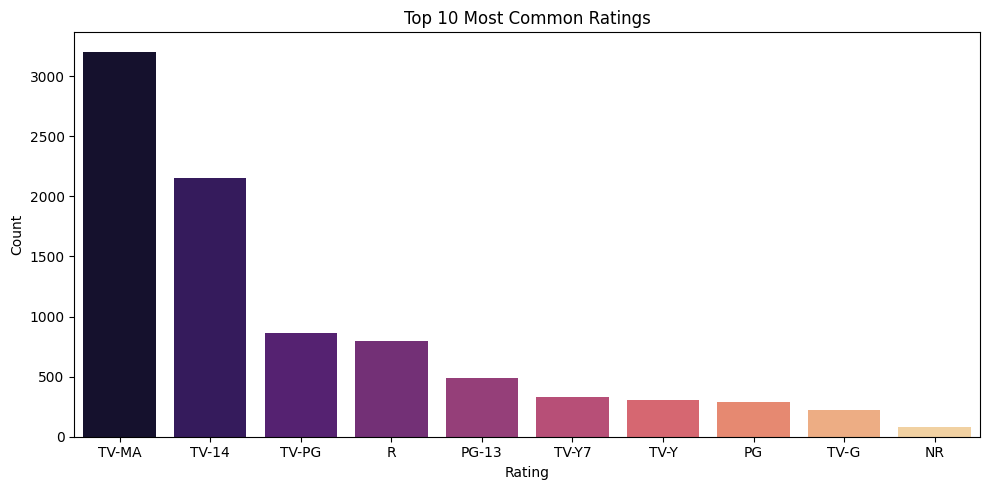

In [36]:
top_ratings = df['rating'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='magma')
plt.title('Top 10 Most Common Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


/tmp/ipython-input-41-2477209526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='cool')


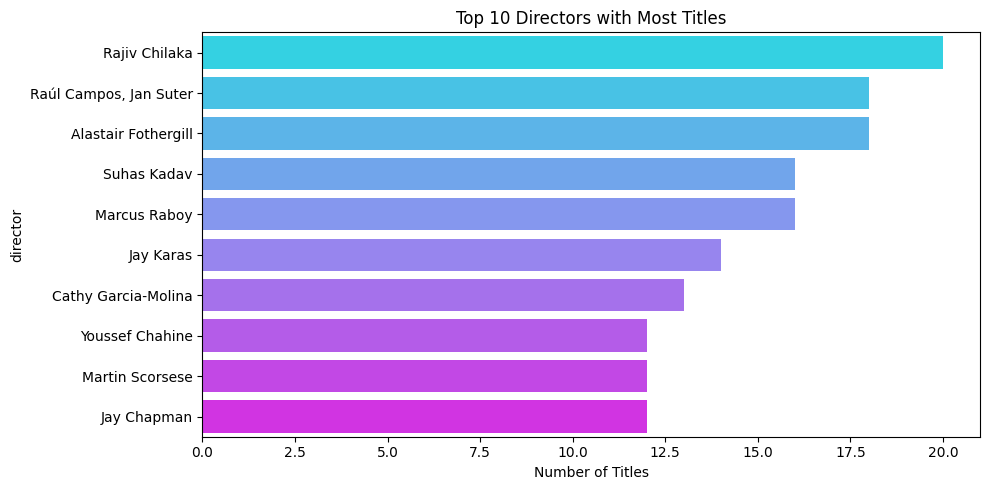

In [41]:
top_directors = df[df['director'] != 'Not Given']['director'].dropna().value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cool')
plt.title('Top 10 Directors with Most Titles')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()

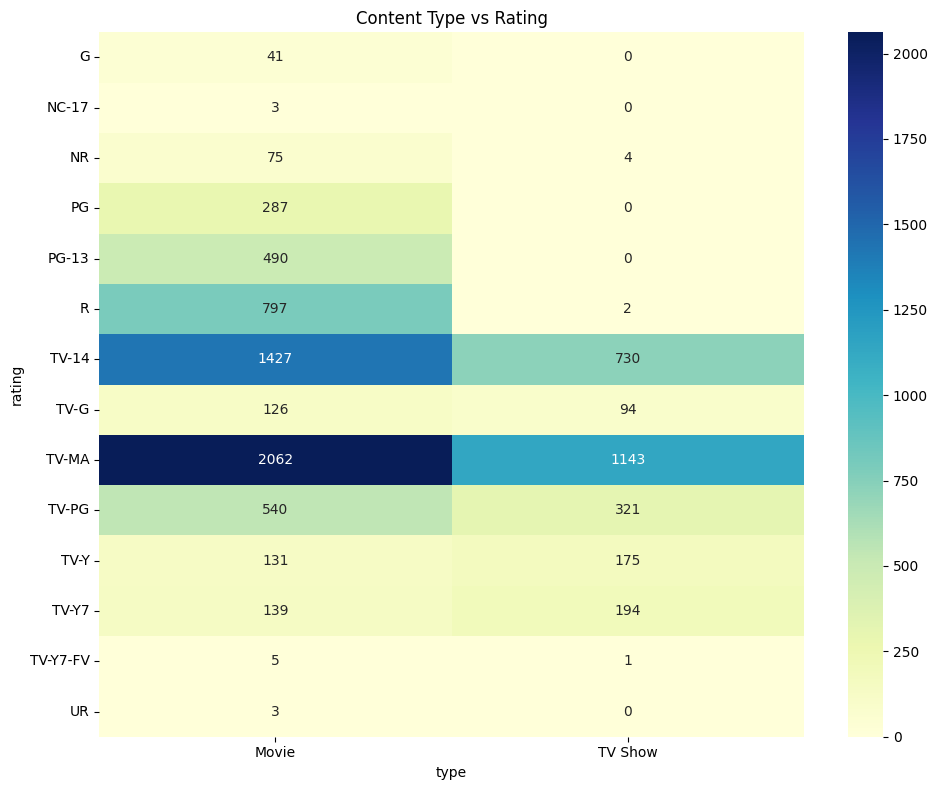

In [38]:
heatmap_data = pd.crosstab(df['rating'], df['type'])

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Content Type vs Rating')
plt.tight_layout()
plt.show()